# Unit 5 - Financial Planning


In [4]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [5]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc=1.2
my_eth=5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [8]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_url=btc_url + "?format=json"
requests.get(btc_url)
btc_data = requests.get(btc_url)
btc_content = btc_data.content
print(btc_content)


b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18712781,\n\t\t\t"total_supply": 18712781,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 45046.0000000000000000,\n\t\t\t\t\t"volume_24h": 76668542108,\n\t\t\t\t\t"market_cap": 843214769148,\n\t\t\t\t\t"percentage_change_1h": -0.1553023502511330,\n\t\t\t\t\t"percentage_change_24h": 2.7616955666316700,\n\t\t\t\t\t"percentage_change_7d": -19.4187238548946000,\n\t\t\t\t\t"percent_change_1h": -0.1553023502511330,\n\t\t\t\t\t"percent_change_24h": 2.7616955666316700,\n\t\t\t\t\t"percent_change_7d": -19.4187238548946000\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1621312377\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1621312377,\n\t\t"num_cryptocurrencies": 1300,\n\t\t"error": null\n\t}\n}'


In [9]:
import json

data = btc_data.json()
print(json.dumps(data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18712781,
            "total_supply": 18712781,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 45046.0,
                    "volume_24h": 76668542108,
                    "market_cap": 843214769148,
                    "percentage_change_1h": -0.155302350251133,
                    "percentage_change_24h": 2.76169556663167,
                    "percentage_change_7d": -19.4187238548946,
                    "percent_change_1h": -0.155302350251133,
                    "percent_change_24h": 2.76169556663167,
                    "percent_change_7d": -19.4187238548946
                }
            },
            "last_updated": 1621312377
        }
    },
    "metadata": {
        "timestamp": 1621312377,
        "num_cry

In [10]:
btc_price=data["data"]["1"]["quotes"]["USD"]["price"]
print(btc_price)

45046.0


In [11]:
# Fetch current ETH price
# YOUR CODE HERE!]
eth_url=eth_url + "?format=json"
requests.get(eth_url)
eth_data = requests.get(eth_url)
eth_content = eth_data.content
print(eth_content)

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 115919704,\n\t\t\t"total_supply": 115919704,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 3449.7000000000000000,\n\t\t\t\t\t"volume_24h": 70466657291,\n\t\t\t\t\t"market_cap": 399566073758,\n\t\t\t\t\t"percentage_change_1h": 1.3719994839052600,\n\t\t\t\t\t"percentage_change_24h": 4.3980055769010500,\n\t\t\t\t\t"percentage_change_7d": -13.3155674556632000,\n\t\t\t\t\t"percent_change_1h": 1.3719994839052600,\n\t\t\t\t\t"percent_change_24h": 4.3980055769010500,\n\t\t\t\t\t"percent_change_7d": -13.3155674556632000\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1621312397\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1621312397,\n\t\t"num_cryptocurrencies": 1300,\n\t\t"error": null\n\t}\n}'


In [12]:
import json

data = eth_data.json()
print(json.dumps(data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115919704,
            "total_supply": 115919704,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3449.7,
                    "volume_24h": 70466657291,
                    "market_cap": 399566073758,
                    "percentage_change_1h": 1.37199948390526,
                    "percentage_change_24h": 4.39800557690105,
                    "percentage_change_7d": -13.3155674556632,
                    "percent_change_1h": 1.37199948390526,
                    "percent_change_24h": 4.39800557690105,
                    "percent_change_7d": -13.3155674556632
                }
            },
            "last_updated": 1621312397
        }
    },
    "metadata": {
        "timestamp": 1621312397,
        "num_crypt

In [13]:
eth_price=data["data"]["1027"]["quotes"]["USD"]["price"]
print(eth_price)

3449.7


In [14]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=btc_price * my_btc
my_eth_value=eth_price * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $54055.20
The current value of your 5.3 ETH is $18283.41


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [15]:
# Current amount of shares
# YOUR CODE HERE!
my_agg=200
my_spy=50

In [16]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [17]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2021-05-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Preview DataFrame
# YOUR CODE HERE!
df_ticker.head()

AGG                                         SPY  \
                             open      high     low    close   volume    open   
time                                                                            
2021-05-17 00:00:00-04:00  114.21  115.4999  111.26  114.165  3852318  415.39   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-17 00:00:00-04:00  416.39  413.36  415.54  57713174

In [18]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price=df_ticker.iloc[0]['AGG','close']
spy_close_price=df_ticker.iloc[0]['SPY','close']
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.165
Current SPY closing price: $415.54


In [19]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value=my_spy * spy_close_price
my_agg_value=my_agg * agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20777.00
The current value of your 200 AGG shares is $22833.00


### Savings Health Analysis

In [20]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000
# Create savings DataFrame
# YOUR CODE HERE!
crypto=my_btc_value + my_eth_value
shares=my_spy_value + my_agg_value

savings={'amount':[71177.80,43588.93]}
df_savings = pd.DataFrame(savings,columns = ['amount'], index = ['crypto', 'shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,71177.80
shares,43588.93


<AxesSubplot:ylabel='amount'>

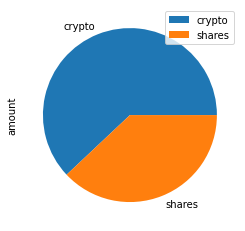

In [21]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind = "pie", y='amount')

In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=crypto + shares
# Validate saving health
if total_savings >emergency_fund:
    print(f"The current value of your savings is more than enough for an emergency fund. Congrats!")
elif total_savings==emergency_fund:
        print(f"The current value of your savings is enough for an emergency fund. Congrats!")
elif total_savings > emergency_fund:
        print(f"The current value of your savings is less than enough for an emergency fund. Keep going!")
# YOUR CODE HERE!

The current value of your savings is more than enough for an emergency fund. Congrats!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-17', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-17', tz='America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_barset(tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257.0   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245.0   
2017-05-30 00:00:00-04:00  109.58  109.66  109.5400  109.635  1199625.0   
2017-05-31 00:00:00-04:00  109.64  109.81  109.6400  109.750  2011554.0   
2017-06-01 00:00:00-04:00  109.36  109.50  109.3409  109.470  2241270.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-05-25 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-05-26 00:00:00-04:00  241.55  241.90  241.45  241.74  30002081.0  
2017-05-30 00:00:00-04:00  241.33  241.79  241.16  241.52  28437351.0  
2017-05-31 00:00:00-04:00  241.84  241.88  240.64  241.42  59140588.0  
2017-06-01 00:00:00-04:00  241.96  243.34  241.64  243.32  50837868.0

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_6040_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [26]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_6040_dist.portfolio_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257.0   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245.0   
2017-05-30 00:00:00-04:00  109.58  109.66  109.5400  109.635  1199625.0   
2017-05-31 00:00:00-04:00  109.64  109.81  109.6400  109.750  2011554.0   
2017-06-01 00:00:00-04:00  109.36  109.50  109.3409  109.470  2241270.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-25 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-05-26 00:00:00-04:00     0.000183  241.55  241.90  241.45  241.74   
2017-05-30 00:00:00-04:00     0.001416  241.33  241.79  241.16  241.52   
2017-05-31 00:00:00-04:00     0.001049  241.84  241.88  240.64  241.42   
2017-06-01 00:00:00-04:00    -0.002551  241.96  243.34  241.64  243.32   

                                                    
                               volume daily_return  
time                                                
2017-05-25 00:00:00-04:00         NaN          NaN  
2017-05-26 00:00:00-04:00  30002081.0          NaN  
2017-05-30 00:00:00-04:00  28437351.0    -0.000910  
2017-05-31 00:00:00-04:00  59140588.0    -0.000414  
2017-06-01 00:00:00-04:00  50837868.0     0.007870

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_6040_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004435,0.994244,1.013033,0.994404,0.986801,0.978864,0.993502,1.003347,1.007300,0.989873,...,1.007582,0.998791,0.998147,1.000548,0.999536,0.988806,0.992885,1.008960,0.998860,1.006167
2,1.012632,0.996191,1.014462,1.000686,0.974327,0.978410,0.990693,1.006372,1.006287,0.971338,...,1.006628,0.999352,0.997992,1.019702,0.984626,0.990083,1.001620,1.017424,1.001011,0.997387
3,1.025709,0.993658,1.013475,1.002362,0.977358,0.987855,0.997583,1.009582,1.003608,0.970725,...,1.011232,1.014208,0.996308,1.011436,0.978366,0.986928,0.996874,1.011032,1.000110,0.989509
4,1.031817,0.989373,1.013425,1.015295,0.976853,0.986078,1.001133,1.019424,0.986269,0.977229,...,1.003374,1.020056,0.998872,1.001373,0.966423,0.984291,1.004080,1.013757,1.012930,0.990606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,69.710465,30.932516,30.307669,5.338275,22.243063,19.311502,6.265798,13.770487,15.861075,11.020359,...,9.794638,25.591140,4.041502,8.334402,23.219166,83.494341,38.606258,48.224364,17.986302,12.118012
7557,69.869964,31.096044,30.426924,5.308501,22.298914,19.282055,6.332783,13.707095,15.817432,11.140068,...,9.812632,25.740897,4.075758,8.245606,23.040250,83.646710,38.476926,48.527436,17.902217,12.107437
7558,69.442700,31.255687,30.318778,5.327359,22.166927,18.930790,6.257288,13.685683,15.774479,10.934255,...,9.738713,25.828987,4.050367,8.421724,23.244011,83.937626,38.745844,48.793430,17.647583,12.133532
7559,69.557117,31.003780,30.703741,5.317382,22.170608,18.805680,6.290780,13.776995,15.596900,10.918597,...,9.832270,25.610198,4.039807,8.371366,23.255255,84.359196,38.840487,48.490725,17.517814,12.217051


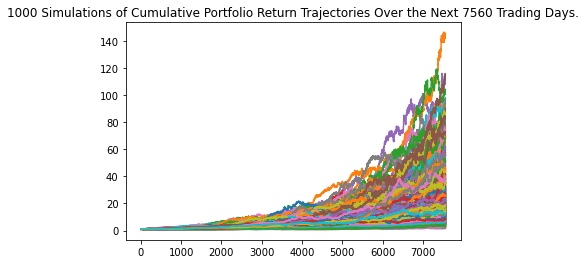

In [28]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_6040_dist.plot_simulation()

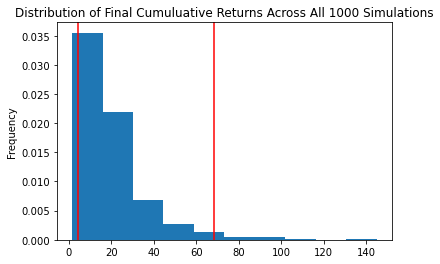

In [29]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_6040_dist.plot_distribution()

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stock_tbl = MC_6040_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(stock_tbl)

count           1000.000000
mean              20.485294
std               16.409727
min                1.509270
25%               10.061894
50%               15.561205
75%               25.778257
max              144.865892
95% CI Lower       4.156087
95% CI Upper      68.200150
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
stock_ci_lower = round(stock_tbl[8]*20000,2)
stock_ci_upper = round(stock_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${stock_ci_lower} and ${stock_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $83121.74 and $1364003.0


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
stock_ci_lower = round(stock_tbl[8]*50000,2)
stock_ci_upper = round(stock_tbl[9]*50000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${stock_ci_lower} and ${stock_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $207804.36 and $3410007.49


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002773,0.995921,0.995673,0.994602,1.005021,0.998532,1.001126,1.005124,0.994500,0.999171,...,1.002697,1.007377,0.999067,0.997822,0.998338,1.003092,0.997770,1.005395,0.999348,1.005300
2,1.004519,0.994920,0.995504,0.997885,0.999418,1.002665,0.998714,1.009062,0.992389,0.997706,...,1.004034,1.008911,0.999323,1.000654,0.999466,1.004265,0.994733,1.003748,0.996511,1.012382
3,1.003420,0.989709,0.994363,1.001670,1.004349,1.002377,1.001845,1.011481,0.991912,0.994580,...,1.002351,1.006664,1.002174,0.998934,1.003854,1.010202,0.996131,1.002018,0.999665,1.014892
4,0.999165,0.990064,0.986792,1.003455,1.007765,1.007514,0.997581,1.015886,0.986637,0.998216,...,1.002834,0.999865,1.000353,1.003079,1.003303,1.012221,0.997754,1.000544,1.001517,1.013704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.266580,1.196174,1.233861,1.609848,1.173492,1.242440,1.329611,1.157732,1.354542,0.980124,...,1.193369,1.265576,1.176646,1.146853,1.214548,1.145207,1.193672,1.131104,1.003777,1.234636
1257,1.259830,1.201814,1.231141,1.621046,1.172662,1.239173,1.331916,1.157722,1.354061,0.980815,...,1.194320,1.269009,1.182694,1.146907,1.213701,1.143455,1.200143,1.131160,1.006530,1.234546
1258,1.265916,1.196261,1.226184,1.622075,1.174943,1.240829,1.335755,1.157986,1.350916,0.981539,...,1.203336,1.271746,1.178878,1.148263,1.213656,1.146064,1.197322,1.134041,1.005902,1.236184
1259,1.268268,1.202293,1.223321,1.623647,1.170809,1.248084,1.336792,1.162289,1.341674,0.977214,...,1.200892,1.273981,1.175435,1.145972,1.210717,1.146312,1.194024,1.132655,1.007751,1.242664


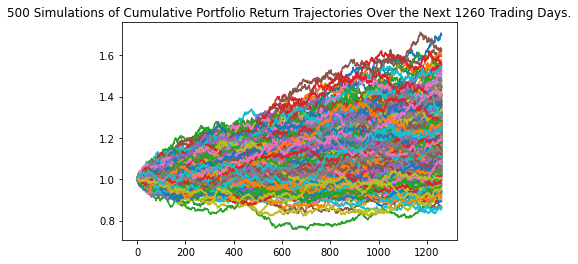

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

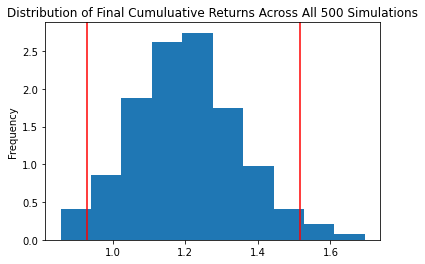

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.202273
std               0.145565
min               0.856322
25%               1.100622
50%               1.197687
75%               1.292270
max               1.695081
95% CI Lower      0.928556
95% CI Upper      1.517173
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $55713.36 and $91030.38


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997817,0.998428,1.000816,1.000202,1.002120,0.998788,1.004226,1.004250,1.001431,1.000740,...,0.995519,1.001253,1.000492,0.994026,1.006129,1.002356,1.005233,0.999769,1.002106,1.003746
2,0.994703,0.996223,1.001987,0.998816,1.002372,0.996708,1.009074,1.006986,1.006219,0.995591,...,0.991815,1.001091,1.003774,0.989341,1.007530,1.009809,1.007273,0.999666,1.006340,0.998303
3,0.994115,0.993375,0.992622,1.001069,0.999700,1.000123,1.011610,1.009254,1.012194,0.998619,...,0.992699,1.003085,1.005997,0.991536,1.004239,1.010765,1.009501,0.999652,1.011737,0.998762
4,0.999040,0.997821,0.992272,0.999767,1.000459,1.006178,1.008906,1.009897,1.014282,0.995619,...,0.997683,1.007825,1.007858,0.991188,1.009171,1.009303,1.008223,1.003270,1.014350,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.164254,1.246948,1.441080,1.685210,1.702114,1.474774,1.535126,1.288182,1.138653,1.500977,...,1.367442,1.357662,1.661583,1.348599,1.649220,1.782632,1.450872,1.701338,1.199957,1.171159
2517,2.169555,1.246315,1.436260,1.685058,1.697652,1.479128,1.536203,1.288485,1.144082,1.498097,...,1.366833,1.360457,1.672969,1.351751,1.646287,1.781356,1.459438,1.695322,1.197466,1.171882
2518,2.169089,1.243387,1.426446,1.685480,1.714264,1.479079,1.537777,1.289258,1.140795,1.496271,...,1.368088,1.357853,1.662915,1.354957,1.637911,1.781046,1.451367,1.695901,1.201111,1.172847
2519,2.170695,1.238881,1.419187,1.670521,1.720418,1.478161,1.544292,1.296500,1.137510,1.499085,...,1.370125,1.359697,1.664317,1.352170,1.633762,1.778638,1.443413,1.699061,1.191529,1.166331


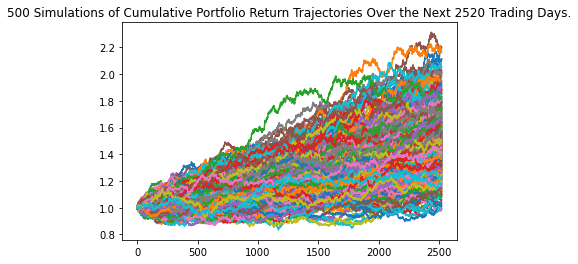

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

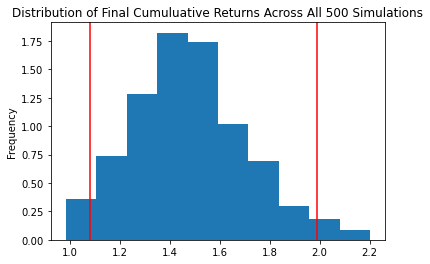

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.477364
std               0.230147
min               0.984413
25%               1.319127
50%               1.468676
75%               1.613270
max               2.202006
95% CI Lower      1.083048
95% CI Upper      1.990417
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
